Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Score: 0.6893939393939394
Random Forest Accuracy (with tuning): 0.7575757575757576
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.76      0.84      0.80        19

    accuracy                           0.76        33
   macro avg       0.76      0.74      0.75        33
weighted avg       0.76      0.76      0.75        33

[[ 9  5]
 [ 3 16]]


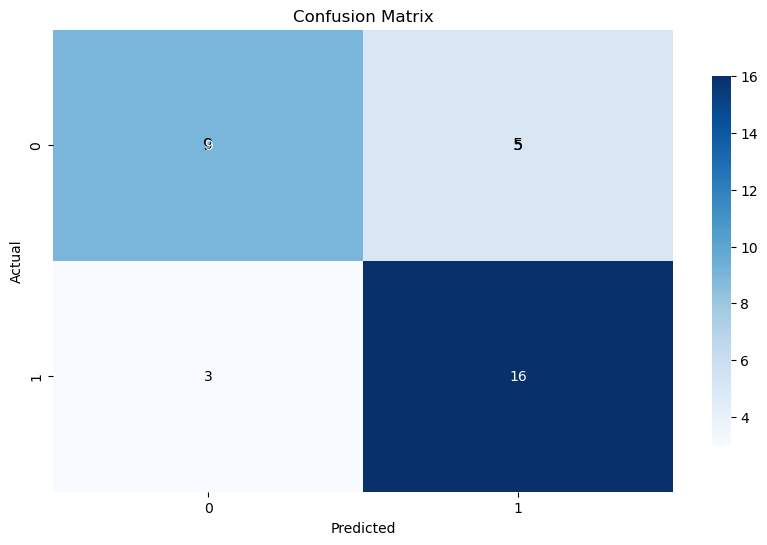

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Handle the absence of seaborn gracefully
try:
    import seaborn as sns
except ImportError:
    print("seaborn is not installed. Please install it using 'pip install seaborn'")
    exit()

# Reading the Excel file
try:
    df = pd.read_excel('Gait_ML_featured_data.xlsx')
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# Splitting the data
X = df.iloc[:, 1:5].values
y = df.iloc[:, 5].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
#consider for higher cv (5 or 10)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Use the best parameters to fit the model
rf_best = RandomForestClassifier(**best_params, random_state=42)
rf_best.fit(X_train, Y_train)
y_pred = rf_best.predict(X_test)

# Evaluate the model
print(f"Random Forest Accuracy (with tuning): {accuracy_score(Y_test, y_pred)}")
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

# Confusion Matrix Plot
plt.figure(figsize=(10, 6))
plt.title('Confusion Matrix')
cm = confusion_matrix(Y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12, "color": "black"},
            cbar_kws={"shrink": 0.8})

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = 'white' if cm[i, j] > cm.max() / 2 else 'black'
        plt.text(j + 0.5, i + 0.5, cm[i, j], horizontalalignment='center', 
                 verticalalignment='center', color=color)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
